In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("shopping-data.csv", header=0, index_col=0)
print(data.shape)
data.head()

(200, 4)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values
print(X.shape)

(200, 2)


Text(0.5, 1.0, 'Distribution of Shopping Dataset')

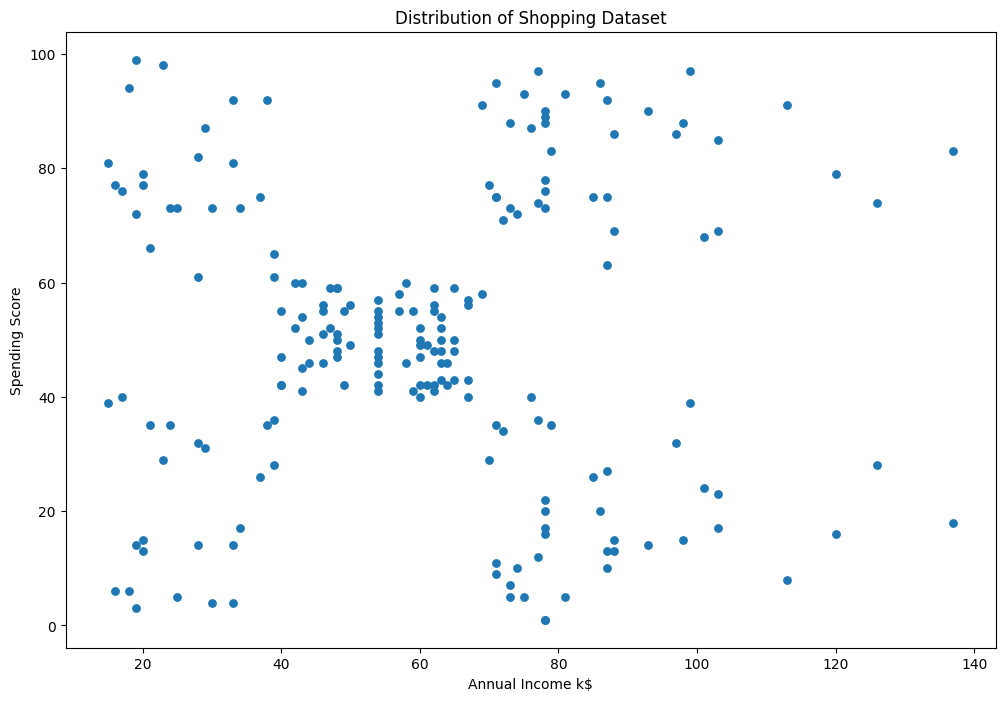

In [4]:
# Biểu đồ hoá các điểm dữ liệu trên đồ thị scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], lw=0, s=40)
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score')
plt.title('Distribution of Shopping Dataset')

In [5]:
std = MinMaxScaler()
X_std = std.fit_transform(X)

Text(0, 0.5, 'dissimilarity metric cluster')

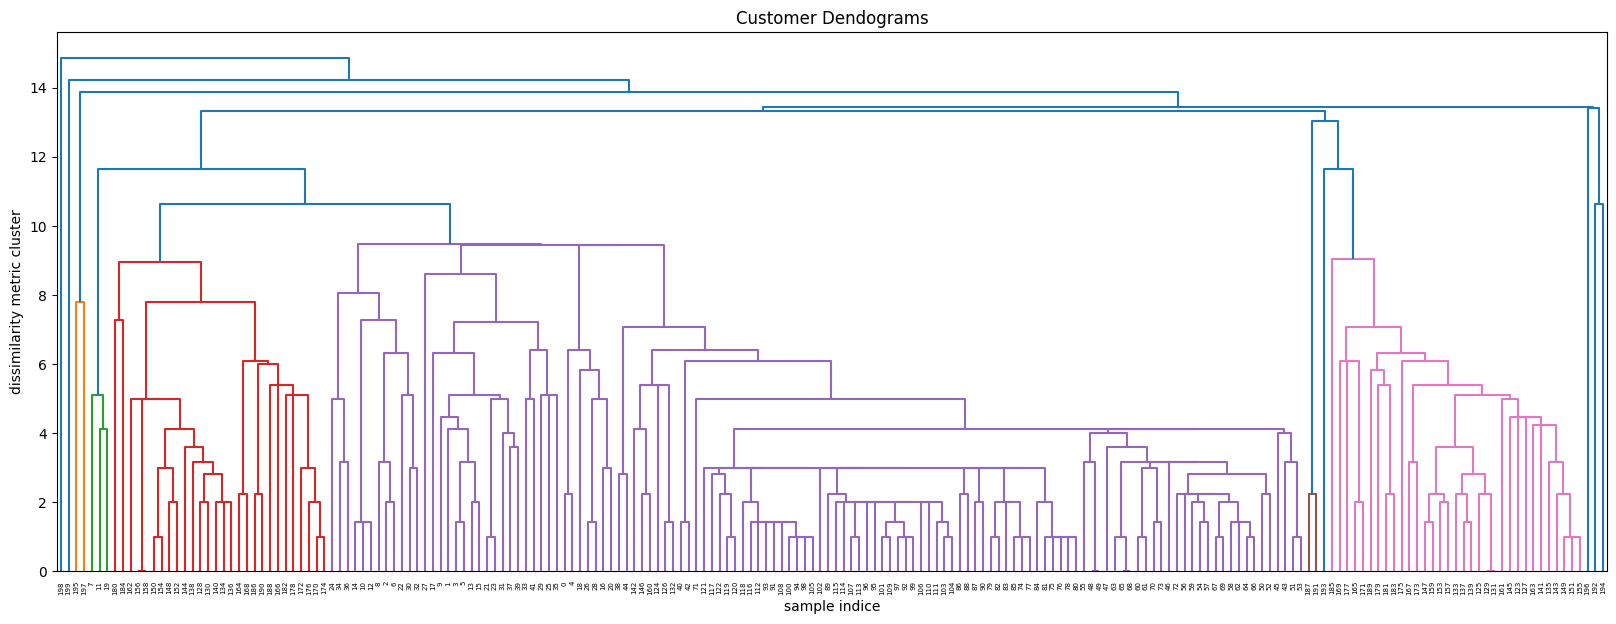

In [7]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='single'))
plt.axhline(200, linestyle='--')
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

Text(0, 0.5, 'dissimilarity metric cluster')

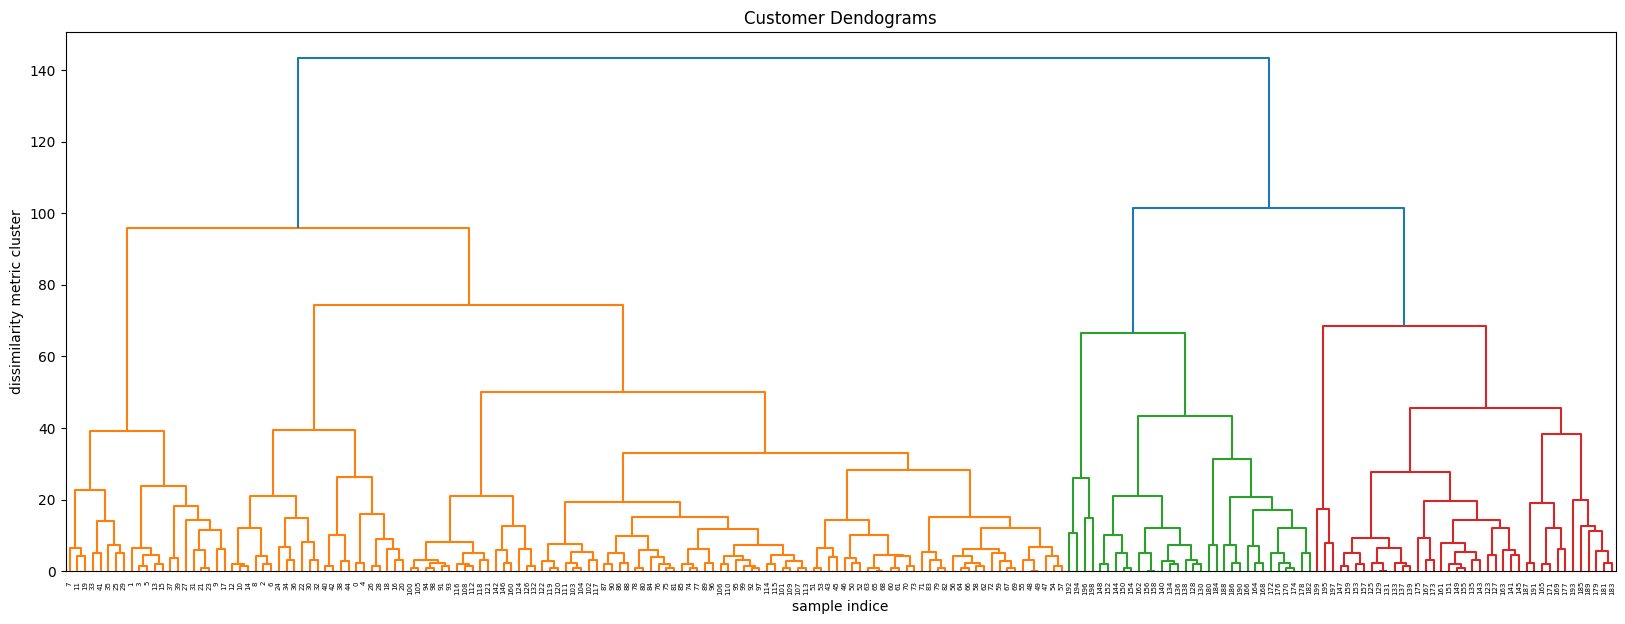

In [8]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='complete'))
plt.axhline(200, linestyle='--')
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

Text(0, 0.5, 'dissimilarity metric cluster')

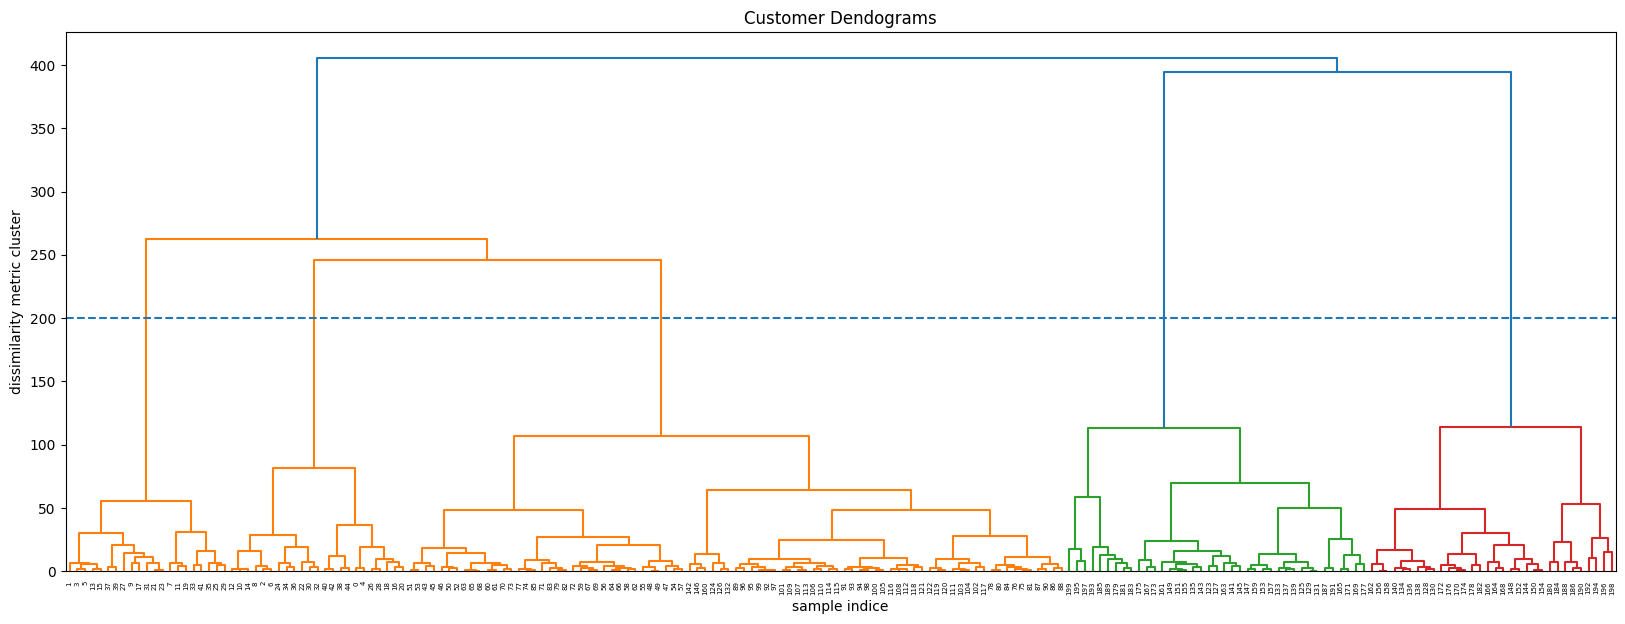

In [9]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(200, linestyle='--')
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

Text(0, 0.5, 'dissimilarity metric cluster')

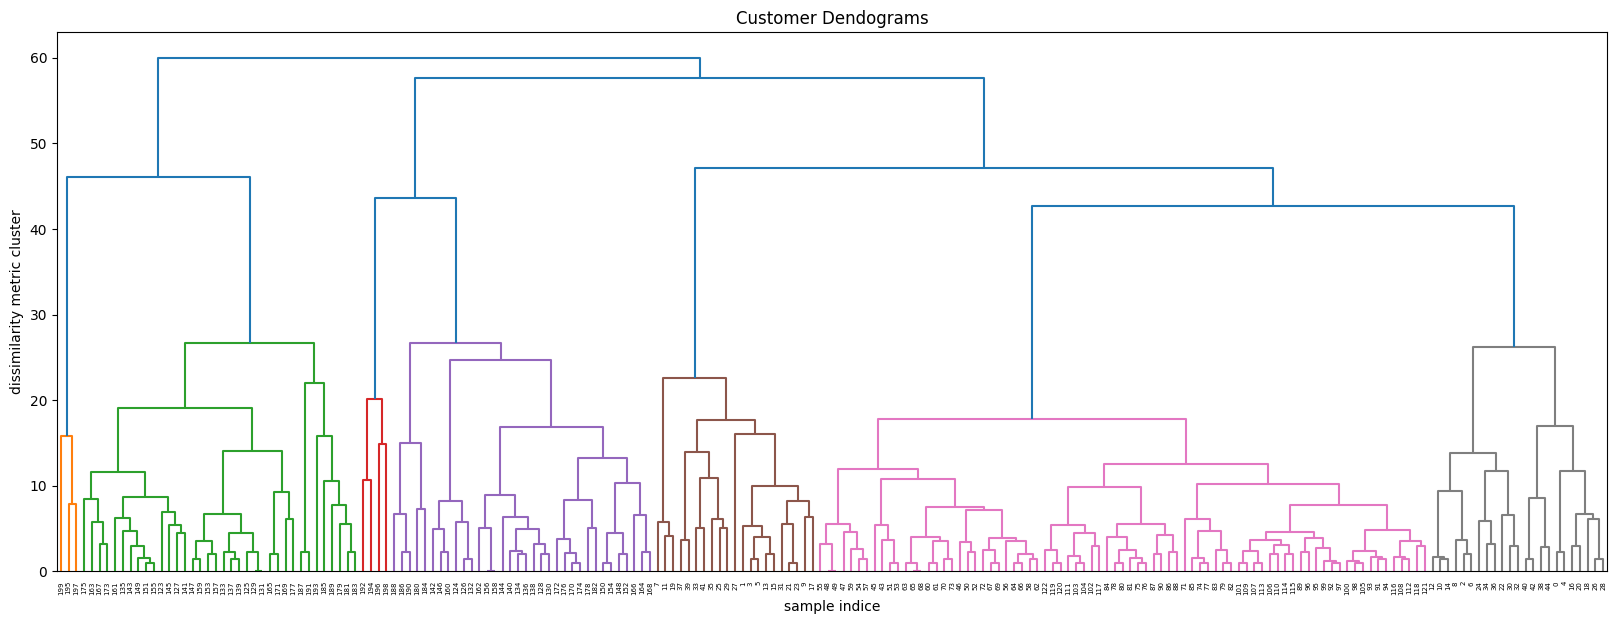

In [11]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='average'))
plt.axhline(200, linestyle='--')
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

In [38]:
AgglomerativeClustering(
  n_clusters=2,  
  metric='euclidean',
  compute_full_tree='auto', 
  linkage='ward', 
  distance_threshold=None, 
  compute_distances=False)

AgglomerativeClustering(metric='euclidean')

In [39]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(X_std)

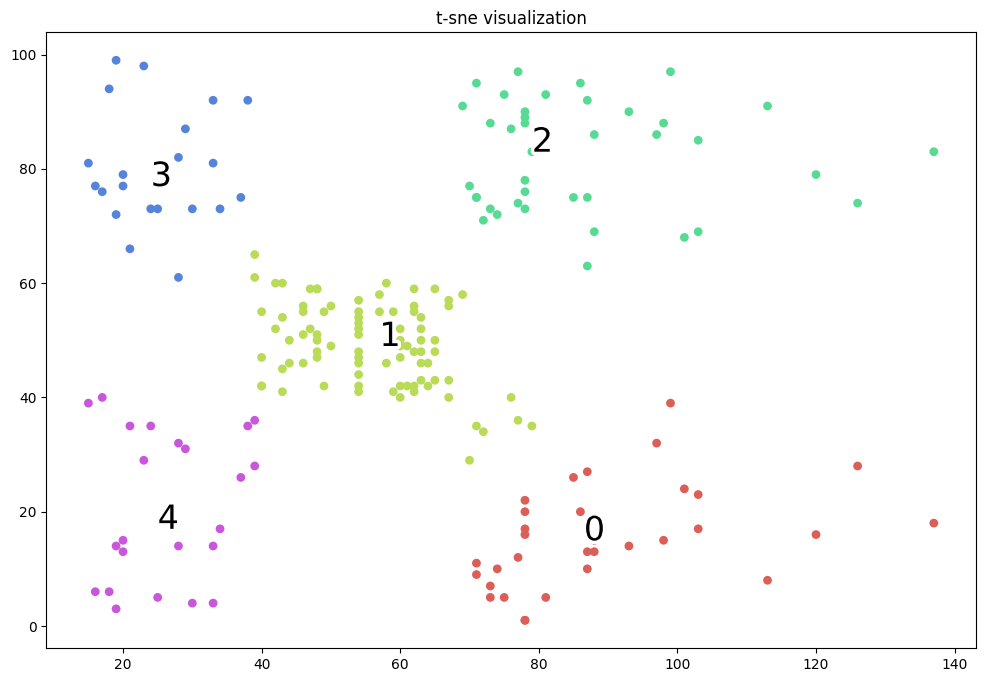

In [43]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(int)])  # Change here

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

_plot_kmean_scatter(X_std, labels)
